#### Map

In [2]:
import numpy as np
import pandas as pd

In [1]:
def sqrt(x):
    return x**0.5


In [3]:
array = np.array([1,4,9,16,25])

In [6]:
list_map_result = map(sqrt,array)

In [9]:
print(list(list_map_result))

[1.0, 2.0, 3.0, 4.0, 5.0]


#### Filter

In [10]:
def is_even(x):
    return x%2==0

In [11]:
array = np.array([1,4,9,16,25])

In [12]:
list_filter_result = filter(is_even,array)

In [13]:
print(list(list_filter_result))

[4, 16]


#### Reduce

In [14]:
from functools import reduce

In [15]:
def add(x,y):
    return x+y

In [16]:
array = np.array([1,4,9,16,25])

In [17]:
reduce_result = reduce(add,array)

In [18]:
reduce_result

55

#### List Comprehension

In [22]:
[item**2 for item in array]


[1, 16, 81, 256, 625]

In [23]:
[item for item in array if item%2==0]

[4, 16]

#### Functions Lambda

In [24]:
list(map(lambda x:x**2,array))

[1, 16, 81, 256, 625]

In [26]:
#Help
?array

In [28]:
%timeit list(map(lambda x:x**2,array))

2.66 µs ± 430 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


#### Concatenate and Join: Numpy

In [29]:
array1 = np.array([1,2,3,4,5])
array2 = np.array([6,7,8,9,10])

print(np.concatenate([array1,array2]))

[ 1  2  3  4  5  6  7  8  9 10]


In [30]:
a = np.ones((3,3))
b = np.zeros((3,3))


In [33]:
np.vstack((a,b))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [34]:
np.hstack((a,b))

array([[1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.]])

In [35]:
#Joining arrays
a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,10])
c = np.array([11,12,13,14,15])

In [36]:
np.column_stack((a,b,c))

array([[ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14],
       [ 5, 10, 15]])

In [37]:
np.row_stack((a,b,c))

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [38]:
#Split arrays
a = np.array([1,2,3,4,5,6,7,8,9,10])
c, d = np.split(a,[3])

In [39]:
c

array([1, 2, 3])

In [40]:
d

array([ 4,  5,  6,  7,  8,  9, 10])

#### Persistent Arrays

In [41]:
np.save('array1',array1)

In [42]:
loaded = np.load('array1.npy')

In [43]:
loaded

array([1, 2, 3, 4, 5])

#### Matrix: 2dim

In [44]:
mat = np.matrix([[1,2,3],[4,5,6],[7,8,9]])

In [45]:
mat

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [46]:
mat.shape

(3, 3)

In [47]:
mat.T

matrix([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])

#### Matrix sparse

In [49]:
import scipy.sparse as sp

In [50]:
rows = np.array([0,0,1,2,2,2])
columns = np.array([0,2,1,0,1,2])
data = np.array([1,2,3,4,5,6])


In [56]:
mat2 = sp.coo_matrix((data,(rows,columns)))

In [57]:
mat2.todense()

matrix([[1, 0, 2],
        [0, 3, 0],
        [4, 5, 6]])

In [58]:
sp.isspmatrix_coo(mat2)

True

#### Vectorize Functions with numpy

In [66]:
def calculate(num):
    if num <=5:
        return num**2
    else:
        return num**3

In [67]:
array = np.array([1,2,3,4,5,6,7,8,9,10])

In [68]:
#Função deve gerar erro, devemos vetorizar a função ou utilizar o map
calculate(array)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [69]:
calculate_vectorized = np.vectorize(calculate)

In [70]:
calculate_vectorized(array)

array([   1,    4,    9,   16,   25,  216,  343,  512,  729, 1000])

In [72]:
%timeit [calculate(item) for item in array]
%timeit calculate_vectorized(array)
%timeit list(map(calculate,array))

5.01 µs ± 567 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
13.6 µs ± 59.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
4.44 µs ± 15.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [79]:
array3 = np.random.randint(0,200,20*100)

In [80]:
%timeit [calculate(item) for item in array3]
%timeit calculate_vectorized(array3)
%timeit list(map(calculate, array3))

754 µs ± 34.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
759 µs ± 3.18 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
678 µs ± 4.01 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

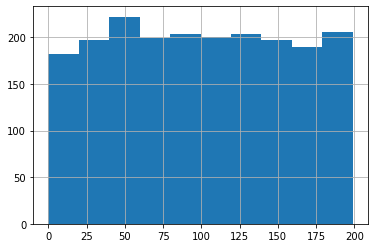

In [93]:
pd.Series(array3).hist()

In [94]:
array4 = np.array([1,2,3,4,5,np.nan,6,7,8,9,10, np.nan,np.nan])

In [96]:
serie = pd.Series(array4)

In [97]:
#Preenche o Nan com o valor anterior
serie.ffill()

0      1.0
1      2.0
2      3.0
3      4.0
4      5.0
5      5.0
6      6.0
7      7.0
8      8.0
9      9.0
10    10.0
11    10.0
12    10.0
dtype: float64

In [99]:
#Preenche o Nan com o próximo valor
serie.bfill()

0      1.0
1      2.0
2      3.0
3      4.0
4      5.0
5      6.0
6      6.0
7      7.0
8      8.0
9      9.0
10    10.0
11     NaN
12     NaN
dtype: float64